# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


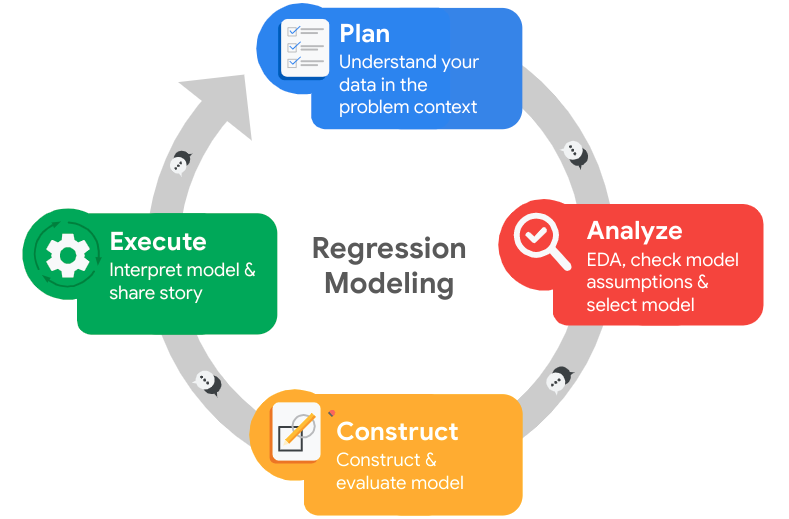

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?





1) Leadership team, Human Resources, Data Analysts

2) How to increase employee retention. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

3) Data is easy to understand and there is not much cleaning to do on cells, there is no Nan cells, there is alot of duplicate rows, few categorical features. Column names are confusing and there is some typos.

4) Jupyter notebook errorhandling. Created new kernel for virtual environment. Then I used SMOTE for data balance. https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html . XGBoost documentation: https://xgboost.readthedocs.io/en/stable/python/index.html . Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

5) Maybe it would be good to inform the employees that their data will be used by the company. Also its good to remember that these prediction of these models are not 100% true.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'leave_company',
       'promotion_last_5years', 'department', 'salary']

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'leave_company', 'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
leave_company            0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,leave_company,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,leave_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.

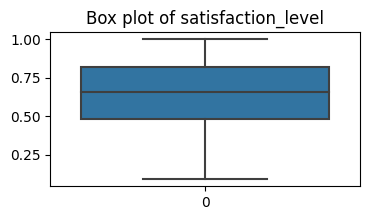

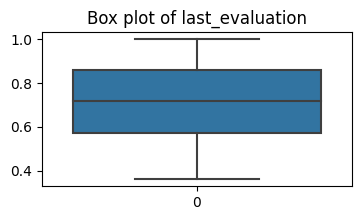

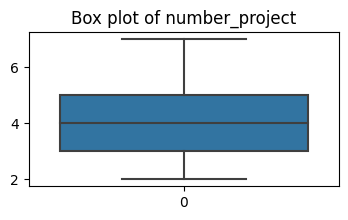

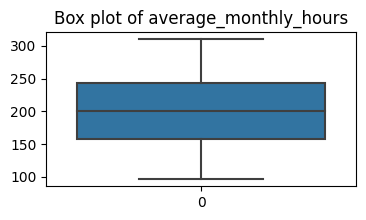

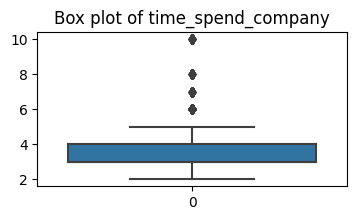

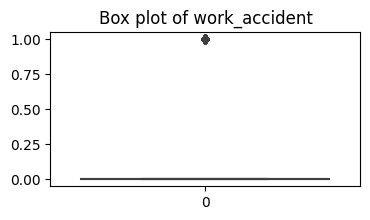

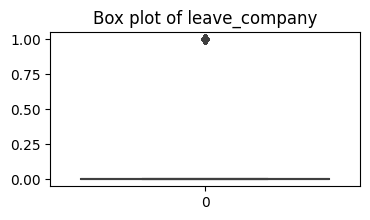

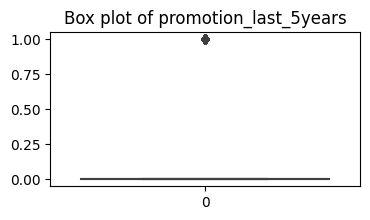

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
for column in df.columns:
    if column not in ["department", "salary"]:
        plt.figure(figsize=(4, 2))
        sns.boxplot(df[column])
        plt.title(f'Box plot of {column}')
        plt.show()

#### From boxplots we can see that, there is only 1 feature with outliers. I decided to keep it there for now.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print("How many people left company(1) and stayed (0)")
print(df.leave_company.value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print("Percentages:")
print(df.leave_company.value_counts()/len(df))

How many people left company(1) and stayed (0)
leave_company
0    10000
1     1991
Name: count, dtype: int64
Percentages:
leave_company
0    0.833959
1    0.166041
Name: count, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [15]:
# I will change categorical variables to numeric
df_one_hot = pd.get_dummies(df, columns=["department", "salary"])

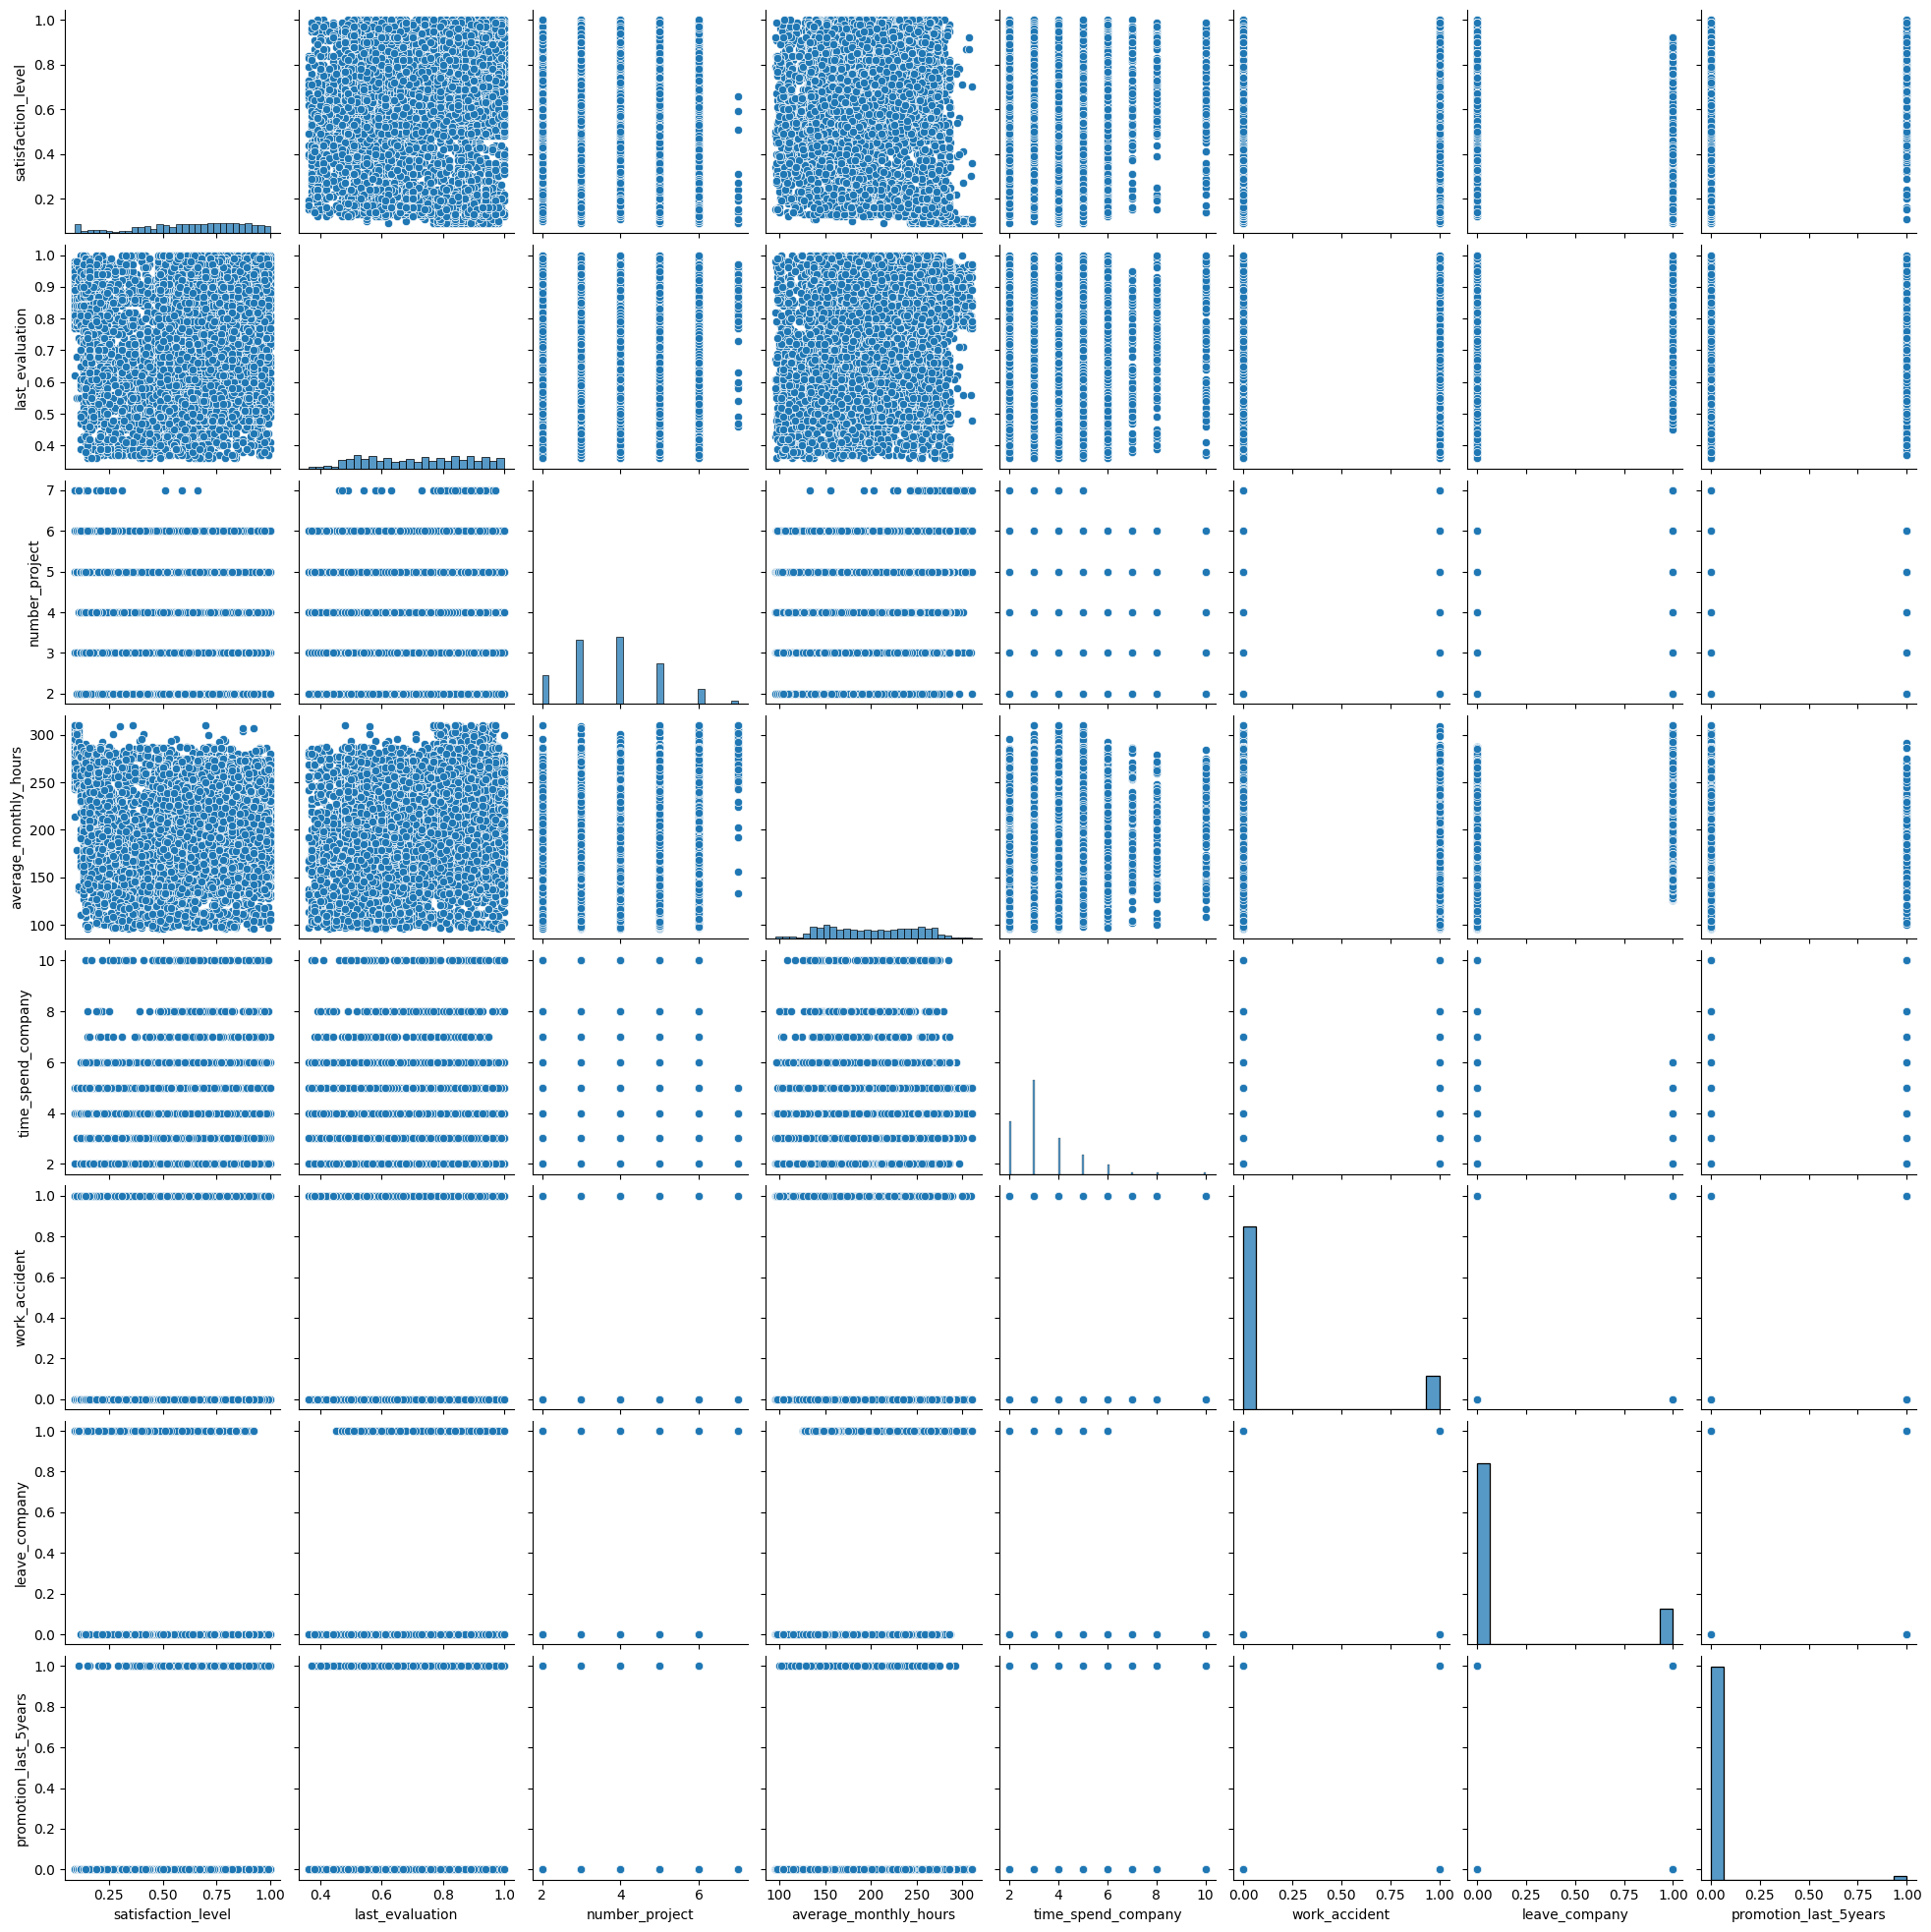

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
# Filter out FutureWarnings related to use_inf_as_na
import warnings
warnings.filterwarnings('ignore', message="use_inf_as_na option is deprecated", category=FutureWarning)
warnings.filterwarnings('ignore', message="The figure layout has changed to tight", category=UserWarning)
sns.pairplot(df)
plt.show()

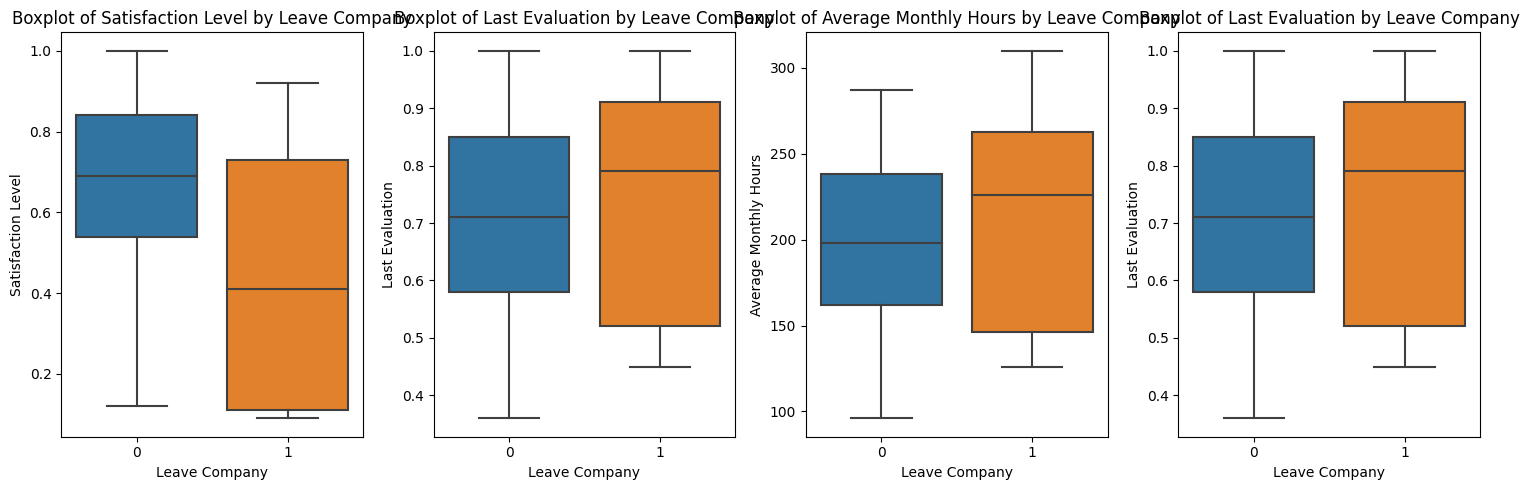

In [113]:
# Create a plot as needed
### YOUR CODE HERE ###
columns_to_plot = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'last_evaluation']

# Create subplots
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i+1)
    sns.boxplot(x='leave_company', y=column, data=df)
    plt.title(f'Boxplot of {column.replace("_", " ").title()} by Leave Company')
    plt.xlabel('Leave Company')
    plt.ylabel(column.replace("_", " ").title())

plt.tight_layout()
plt.show()

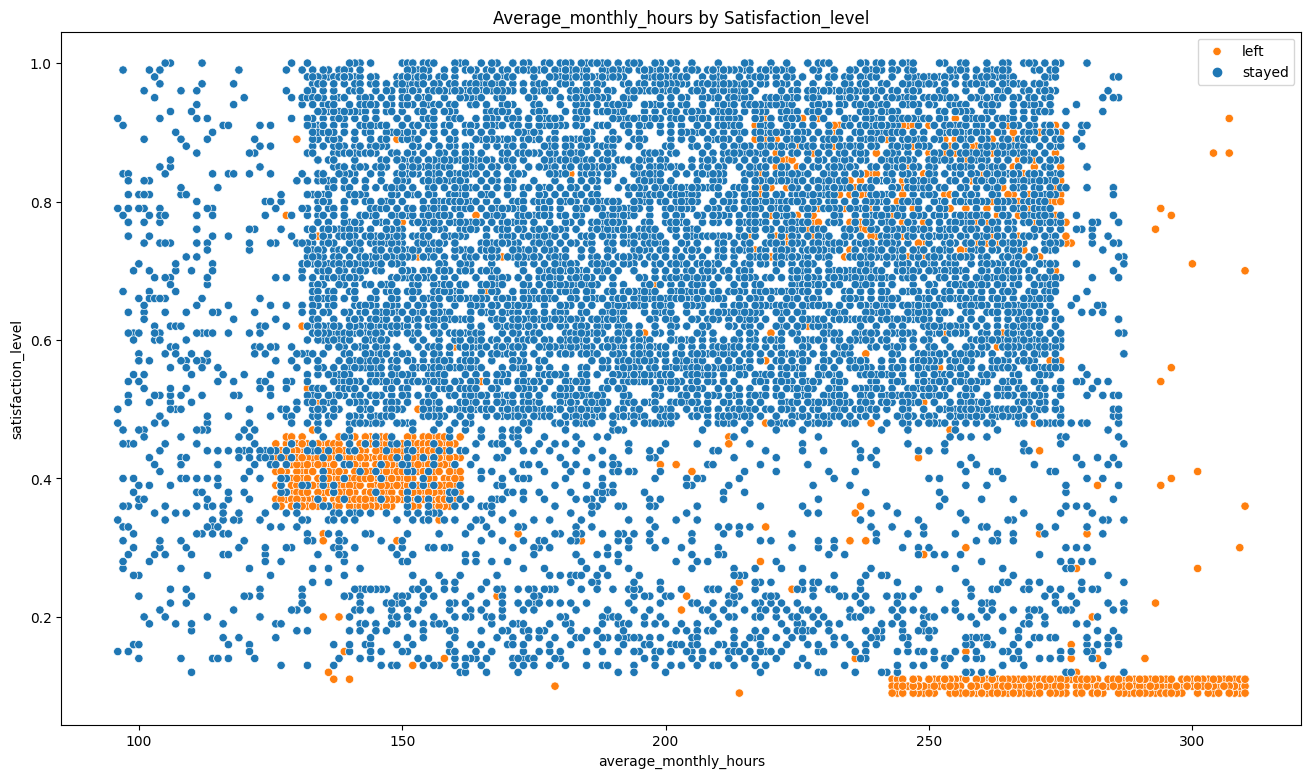

In [119]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='leave_company')
plt.legend(labels=['left', 'stayed'])
plt.title('Average_monthly_hours by Satisfaction_level');

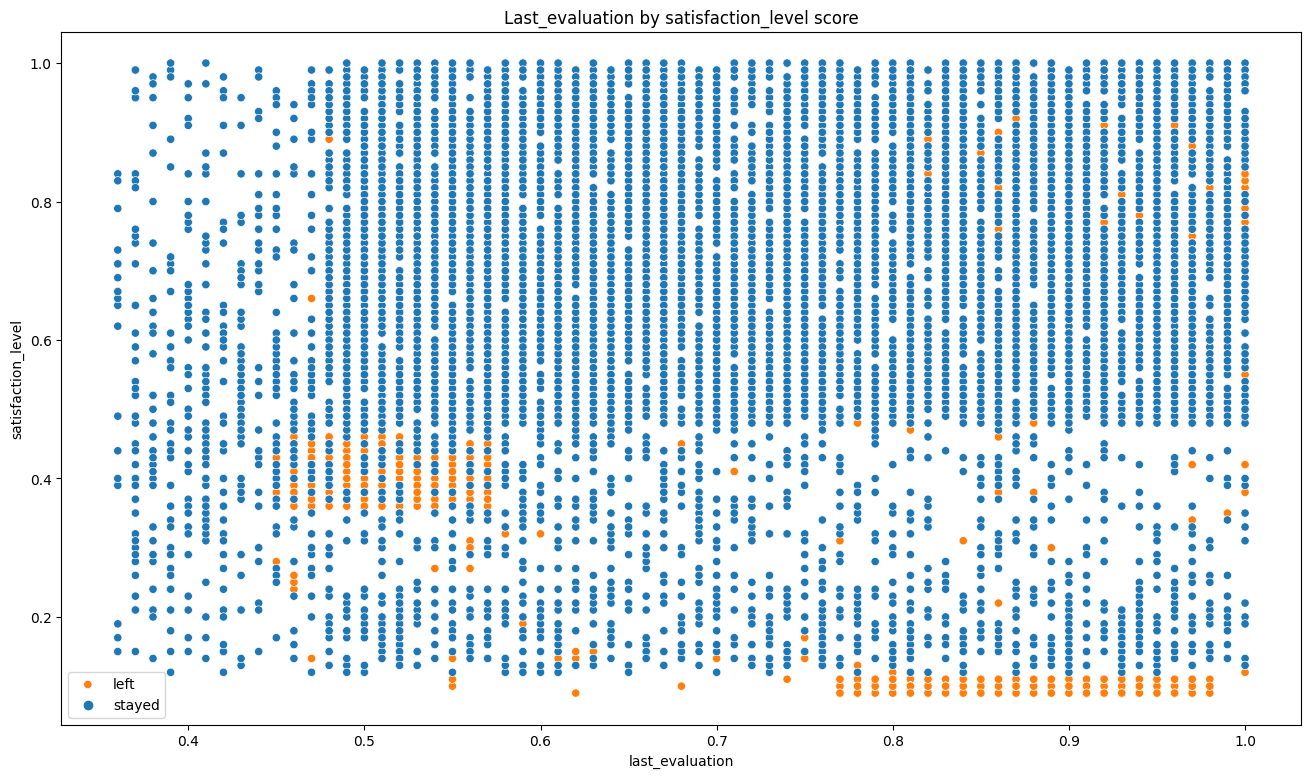

In [120]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='last_evaluation', y='satisfaction_level', hue='leave_company')
plt.legend(labels=['left', 'stayed'])
plt.title('Last_evaluation by satisfaction_level score');

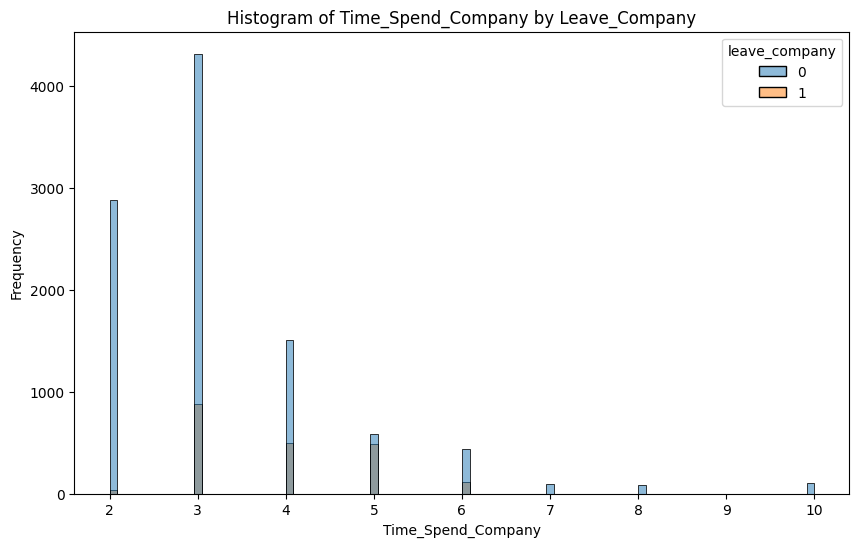

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time_spend_company', hue='leave_company')
plt.title('Histogram of Time_Spend_Company by Leave_Company')
plt.xlabel('Time_Spend_Company')
plt.ylabel('Frequency')
plt.show()

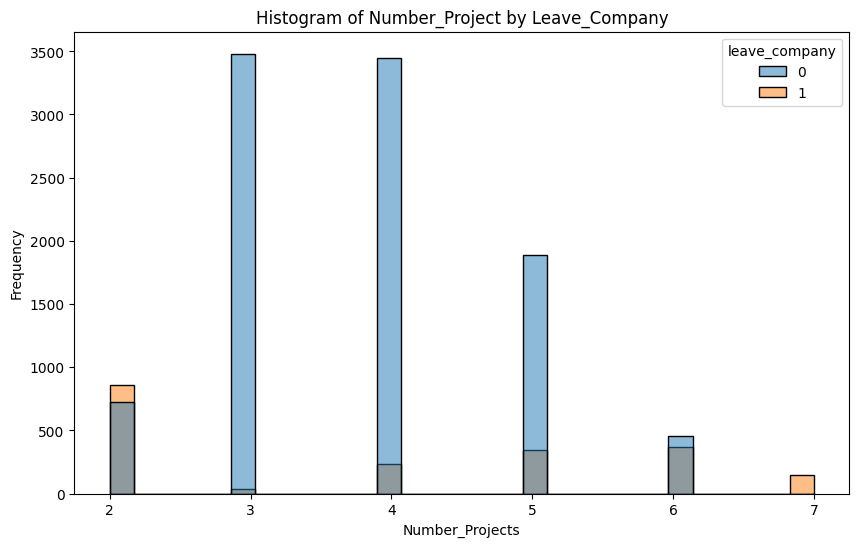

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='number_project', hue='leave_company')
plt.title('Histogram of Number_Project by Leave_Company')
plt.xlabel('Number_Projects')
plt.ylabel('Frequency')
plt.show()

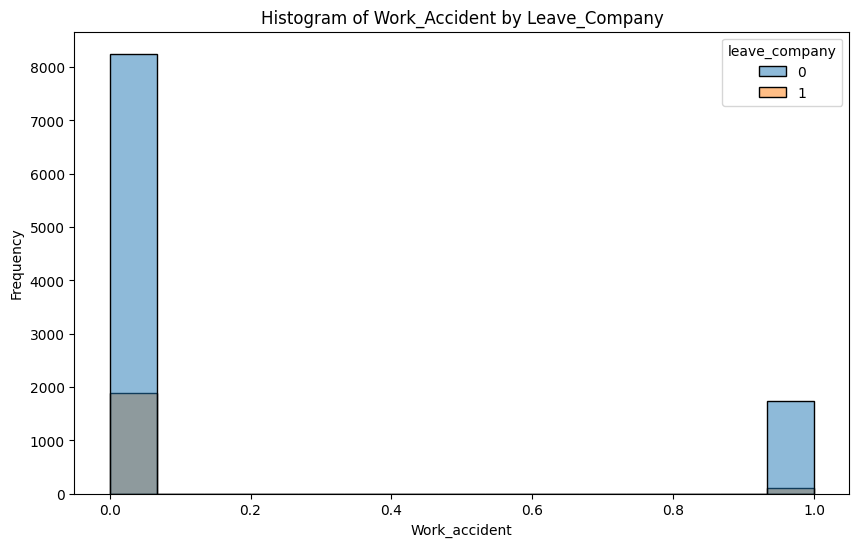

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='work_accident', hue='leave_company')
plt.title('Histogram of Work_Accident by Leave_Company')
plt.xlabel('Work_accident')
plt.ylabel('Frequency')
plt.show()

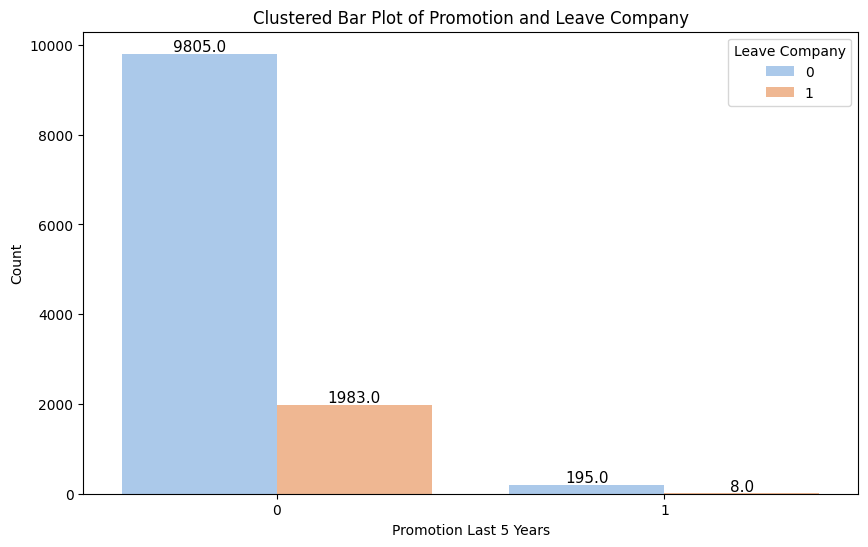

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='promotion_last_5years', hue='leave_company', data=df, palette='pastel')
# Get the counts for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Clustered Bar Plot of Promotion and Leave Company')
plt.xlabel('Promotion Last 5 Years')
plt.ylabel('Count')
plt.legend(title='Leave Company')
plt.show()

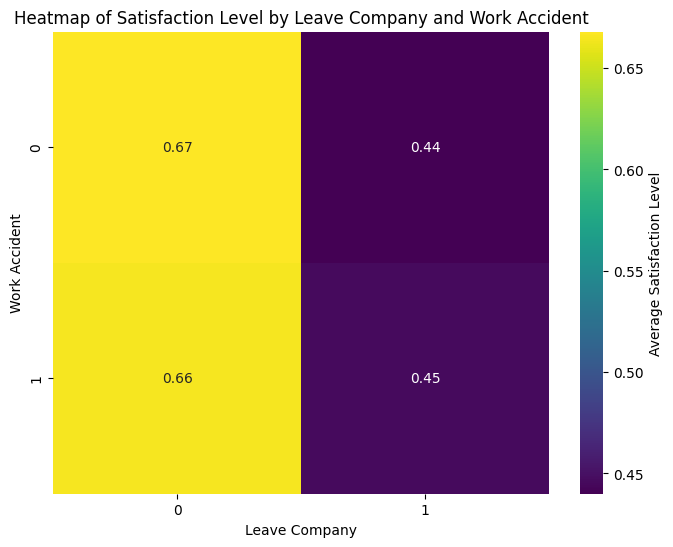

In [121]:
pivot_table = df.pivot_table(values='satisfaction_level', index='work_accident', columns='leave_company', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', cbar_kws={'label': 'Average Satisfaction Level'})
plt.title('Heatmap of Satisfaction Level by Leave Company and Work Accident')
plt.xlabel('Leave Company')
plt.ylabel('Work Accident')
plt.show()

#### Comment for heatmap: Work accidents have nothing to do with the employees leaving the company. If satisfaction level is low then employee might leave the company.

### Insights

##### What insights can you gather from the plots you created to visualize the data?

- Important features: Satisfaction level is low for potential leaver, leavers do more hours on average, leavers dont spend so much time on company, leavers have too few or too many projects.

- Not so important: Work accidents, Promotion.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [78]:
from sklearn.model_selection import train_test_split

X = df_one_hot.drop(columns=["leave_company"])
y = df_one_hot["leave_company"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [79]:
print(X_train.count())

satisfaction_level        7194
last_evaluation           7194
number_project            7194
average_monthly_hours     7194
time_spend_company        7194
work_accident             7194
promotion_last_5years     7194
department_IT             7194
department_RandD          7194
department_accounting     7194
department_hr             7194
department_management     7194
department_marketing      7194
department_product_mng    7194
department_sales          7194
department_support        7194
department_technical      7194
salary_high               7194
salary_low                7194
salary_medium             7194
dtype: int64


In [80]:
# First, I will balance data
from imblearn.over_sampling import SMOTE
# Use custom strategy
sampling_strategy = {0: 6010, 1:6010}
# Create smote object
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Fit 
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(X_resampled.count())

satisfaction_level        12020
last_evaluation           12020
number_project            12020
average_monthly_hours     12020
time_spend_company        12020
work_accident             12020
promotion_last_5years     12020
department_IT             12020
department_RandD          12020
department_accounting     12020
department_hr             12020
department_management     12020
department_marketing      12020
department_product_mng    12020
department_sales          12020
department_support        12020
department_technical      12020
salary_high               12020
salary_low                12020
salary_medium             12020
dtype: int64


### A) First I choose to use XGBoost algorithm
##### "XGBoost is an implementation of Gradient Boosted decision trees."

In [81]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [75, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [5, 6, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
# 3 fold crossvalidation
xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, 
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
xgb_grid_search.fit(X_resampled, y_resampled)

C:\Users\Toni\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Toni\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Toni\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [5, 6, 7], 'n_estimators': [75, 100, 150],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='f1', verbose=1)

In [96]:
# Best parameters from GridSearchCV
print(f"Best parameters: {xgb_grid_search.best_params_}")

# Best estimator
best_xgb = xgb_grid_search.best_estimator_

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the predictions
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Test data Accuracy: {accuracy_xgb:.2f}")

# Evaluate on the validation set
y_val_pred = xgb_grid_search.predict(X_val)
print("Validation set classification report:")
print(classification_report(y_val, y_val_pred))

# Detailed classification report
print("Test data Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9}
Test data Accuracy: 0.98
Validation set classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1988
           1       0.96      0.90      0.93       410

    accuracy                           0.98      2398
   macro avg       0.97      0.95      0.96      2398
weighted avg       0.98      0.98      0.98      2398

Test data Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2003
           1       0.95      0.93      0.94       396

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



<Figure size 640x480 with 0 Axes>

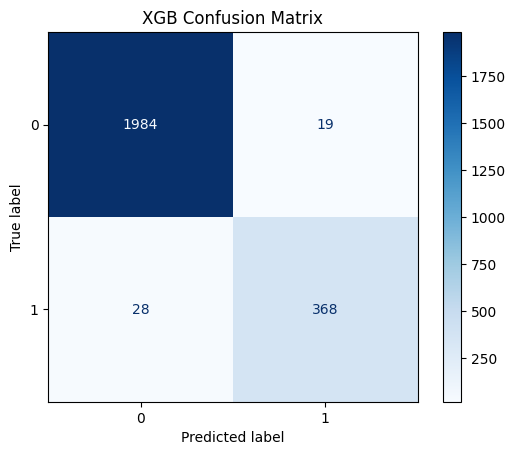

In [88]:
# Confusion matrix for the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.clf()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=best_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGB Confusion Matrix")
plt.show()

Validation Accuracy: 0.98


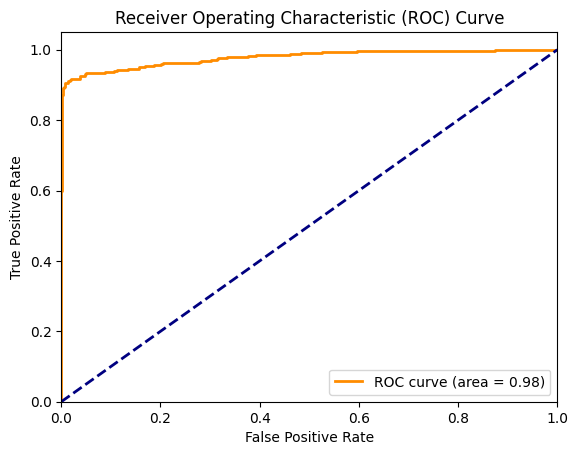

In [90]:
from sklearn.metrics import roc_curve, auc, f1_score

# Evaluate on the validation set
y_val_pred = best_xgb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Calculate AUC-ROC on the validation set
y_val_prob = best_xgb.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

XGB's importances:


<Figure size 640x480 with 0 Axes>

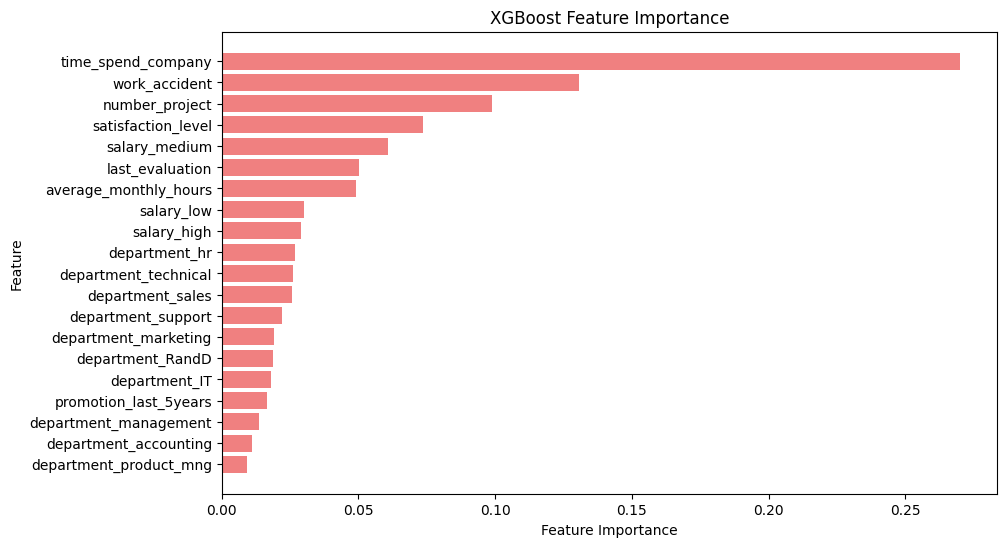

In [91]:
# Plot feature importances

print("XGB's importances:")

# Get feature importances
feature_importances_xgb = best_xgb.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df_xgb = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_xgb
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.clf()
plt.figure(figsize=(10, 6))
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'], color='lightcoral')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### B) Random Forest
##### "A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting."

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=40)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
rf_grid_search.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=40), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [93]:
# Best parameters from GridSearchCV
print(f"Best parameters: {rf_grid_search.best_params_}")

# Best estimator
best_rf = rf_grid_search.best_estimator_

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Test data Accuracy: {accuracy:.2f}")

# Evaluate on the validation set
y_val_pred = rf_grid_search.predict(X_val)
print("Validation set classification report:")
print(classification_report(y_val, y_val_pred))

# Detailed classification report
print("Test data Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.98
Validation set classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1988
           1       0.98      0.89      0.93       410

    accuracy                           0.98      2398
   macro avg       0.98      0.94      0.96      2398
weighted avg       0.98      0.98      0.98      2398

Test data Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2003
           1       0.96      0.92      0.94       396

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



<Figure size 640x480 with 0 Axes>

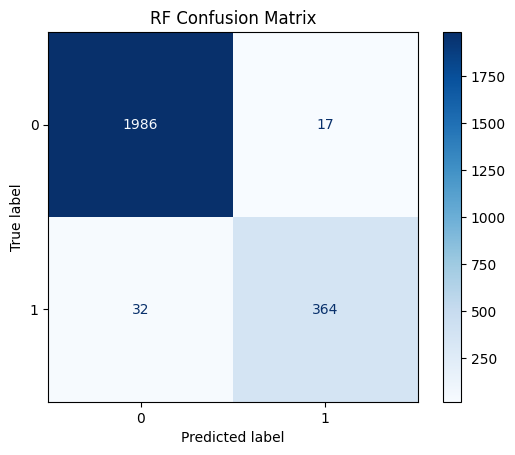

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.clf()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("RF Confusion Matrix")
plt.show()

Validation Accuracy: 0.98


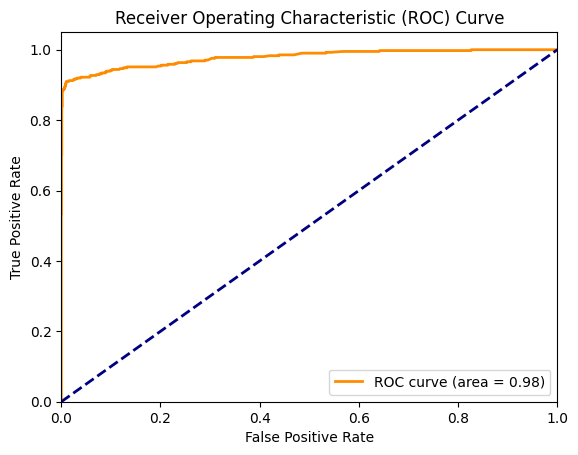

In [98]:
from sklearn.metrics import roc_curve, auc

# Evaluate on the validation set
y_val_pred = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Calculate AUC-ROC on the validation set
y_val_prob = best_rf.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<Figure size 640x480 with 0 Axes>

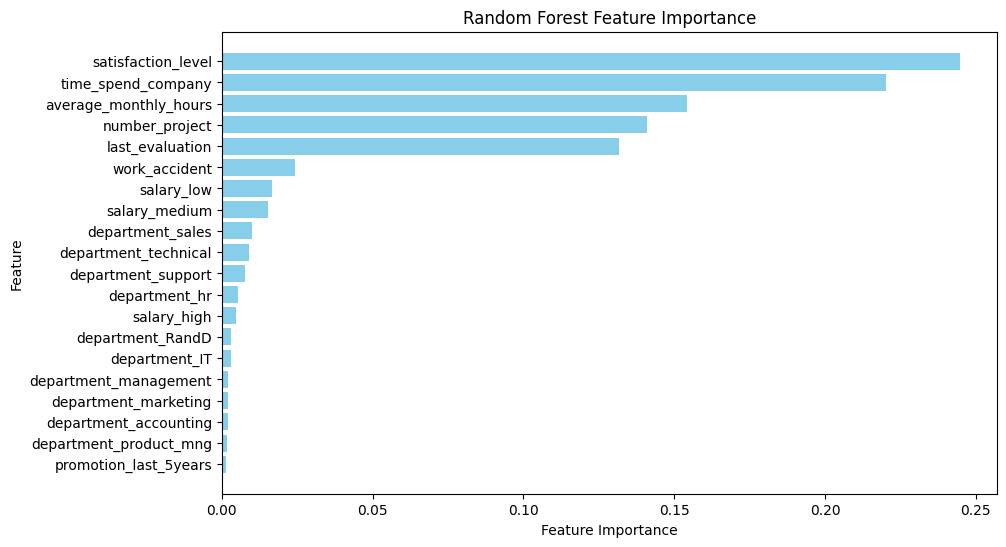

In [99]:
# Calculate feature importance
feature_importances = best_rf.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.clf()
plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#### B.2) Random Forest without data balancing

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rfb_clf = RandomForestClassifier(random_state=40)

# Initialize GridSearchCV
rfb_grid_search = GridSearchCV(estimator=rfb_clf, param_grid=param_grid, 
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
rfb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=40), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [106]:
# Best parameters from GridSearchCV
print(f"Best parameters: {rfb_grid_search.best_params_}")

# Best estimator
best_rfb = rfb_grid_search.best_estimator_

# Predict on the test set
y_pred_rfb = best_rfb.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_rfb)
print(f"Test data Accuracy: {accuracy:.2f}")

print("Validation Classification Report:")
print(classification_report(y_val, y_val_predb))

# Detailed classification report
print("Test data Classification Report:")
print(classification_report(y_test, y_pred_rfb))

Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test data Accuracy: 0.98
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1988
           1       0.99      0.89      0.94       410

    accuracy                           0.98      2398
   macro avg       0.99      0.94      0.96      2398
weighted avg       0.98      0.98      0.98      2398

Test data Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2003
           1       0.98      0.92      0.95       396

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



<Figure size 640x480 with 0 Axes>

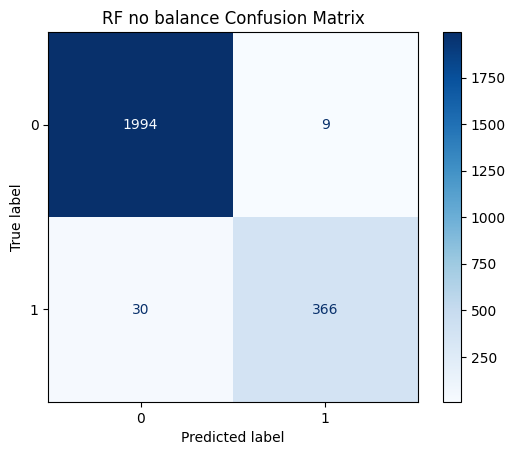

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_rfb = confusion_matrix(y_test, y_pred_rfb)
plt.clf()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfb, display_labels=best_rfb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("RF no balance Confusion Matrix")
plt.show()

Validation Accuracy: 0.98


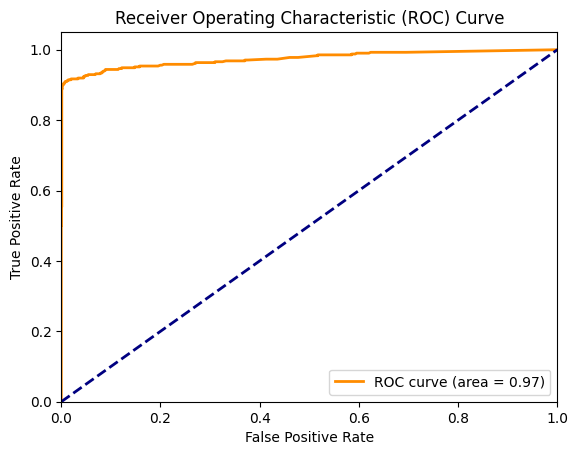

In [105]:
from sklearn.metrics import roc_curve, auc

# Evaluate on the validation set
y_val_predb = best_rfb.predict(X_val)
val_accuracyb = accuracy_score(y_val, y_val_predb)
print(f"Validation Accuracy: {val_accuracyb:.2f}")


# Calculate AUC-ROC on the validation set
y_val_prob = best_rfb.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<Figure size 640x480 with 0 Axes>

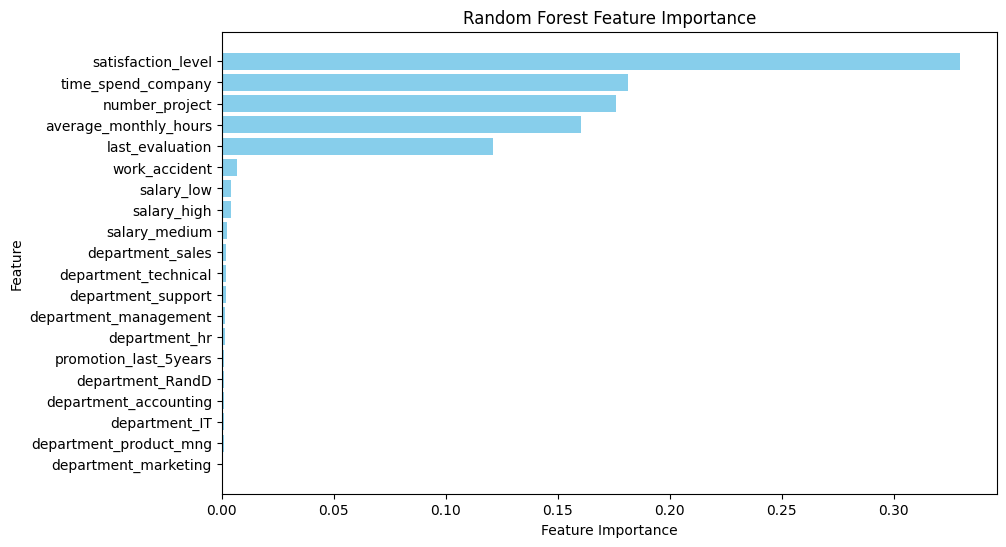

In [77]:
# Calculate feature importance
featureb_importances = best_rfb.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df_rfb = pd.DataFrame({
    'Feature': features,
    'Importance': featureb_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.clf()
plt.figure(figsize=(10, 6))
plt.barh(importance_df_rfb['Feature'], importance_df_rfb['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



#### My Answers
1) The key insight that emerged from my models is that data is easily trainable, and three different models were trained using different approaches, which is evident from the feature importances.
   
2) Based on my models, I would recommend that increasing satisfaction levels and employer engagement will increase the probability that an employee won't leave the company. Additionally, I would advise against increasing employees' working hours if they are already high.
   
3) I would recommend to the HR department that they focus on things that increase employee satisfaction, as this is a key factor in reducing employee turnover.
   
4) Yes, I believe my model could be improved. One way to improve the model is to remove outliers from the data. Additionally, the model could be improved by using more time to calculate hyperparameters, trying different cross-validation folds, and using different splits between train and test data. Another approach could be to use deep learning (neural networks), but this would make it difficult to extract feature importances.
   
5) Some other questions I would like to address include: Why is there a low amount of employees promoted within the last 5 years? Are there limitations on the amount of projects an employee can take on? Why do employees always leave if they have 7 projects? How exactly is satisfaction level measured?
    
6) I used Jupyter Notebook for error handling and created a new kernel for a virtual environment. I also used SMOTE for data balancing https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html . XGBoost documentation: https://xgboost.readthedocs.io/en/stable/python/index.html . Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
   
7) Yes, one ethical consideration is that employees should be informed that their data will be used by the company. Additionally, it's important to remember that the predictions made by these models are not 100% true and should be used as a guide rather than a definitive answer.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders





Models are already evaluated and the best model was chosen to be the Random Forest without smote data balancing.

### Summary of model results

All three models we tested gave 98% accuracy. Random Forest algorithm were tested with data balancing and without. XGBoost were only tested with data balancing. We picked random forest without data balancing to be the best model.

### Conclusion, Recommendations, Next Steps

Random Forest without data balancing gave us the best model. Also random forest and xgb algorithms were tested with data balancing.
In both Random Forests 'satisfaction level' was most important feature while in XGB 'time spend company' was most important feature.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.